<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Global_Pollution_Analysis_and_Energy_Recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import & Preprocess Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

Load Dataset

In [2]:
df_raw = pd.read_csv('/content/Global_Pollution_Analysis.csv')
df_raw.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

Since no missing values, skip imputation

In [4]:
df_raw['Country'].value_counts()

,count
Country,
Latvia,3
Moldova,3
Romania,2
Mexico,2
Germany,2
...,...
Barbados,1
Saint Kitts and Nevis,1
Saint Helena,1


In [5]:
# The Country feature contained 175 unique values for only 200 records, leading to high cardinality.
# Encoding this feature would cause overfitting and poor generalization.
#  Therefore, it was excluded from model training

df = df_raw.drop('Country', axis=1)

Normalize Pollution & Waste Features

In [8]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index',
    'Industrial_Waste (in tons)','Plastic_Waste_Produced (in tons)',
    'CO2_Emissions (in MT)','Energy_Consumption_Per_Capita (in MWh)',
    'Population (in millions)','GDP_Per_Capita (in USD)'
]

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [9]:
df.duplicated().sum()

np.int64(0)

no duplicate row found

In [10]:
df.head()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,2005,1.376167,0.193880,-0.619764,1.543328,158.14,-1.356325,41.11,0.874923,0.561742,-1.093143,-0.737646
1,2001,-1.403578,-1.153098,1.028744,0.124915,498.04,-1.284276,36.44,0.600289,-0.756197,0.580978,-0.023527
2,2016,-1.330788,-0.668076,1.142400,0.123888,489.51,1.718910,9.38,-0.395504,0.667825,0.355836,1.156054
3,2018,1.494394,-1.009403,0.431675,0.809131,145.18,-1.106232,18.97,-1.064327,-1.556310,-0.642506,-0.693157
4,2008,-0.021926,0.262567,1.138106,0.882681,40.38,-0.689181,34.00,1.024815,0.612087,1.448956,0.312447


Descriptive Statistics

In [11]:
df.describe()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,2009.335000,7.549517e-17,-3.552714e-16,2.486900e-16,-2.220446e-16,260.448700,1.776357e-17,27.799700,-3.774758e-17,-8.881784e-17,-1.931788e-16,-1.776357e-16
std,5.765325,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,147.141923,1.002509e+00,12.361879,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,2000.000000,-1.947928e+00,-1.768540e+00,-1.650240e+00,-1.910136e+00,11.730000,-1.590483e+00,5.040000,-1.664895e+00,-1.601260e+00,-1.796052e+00,-1.750064e+00
25%,2004.000000,-6.823730e-01,-8.536990e-01,-8.989775e-01,-7.986976e-01,118.355000,-9.462011e-01,17.700000,-8.097882e-01,-8.726178e-01,-7.630047e-01,-8.121558e-01
50%,2010.000000,4.122312e-02,-5.821733e-02,5.332837e-02,8.865215e-02,273.140000,3.303851e-02,29.170000,-2.581487e-02,-3.789300e-02,1.222075e-02,-1.359945e-02
75%,2014.000000,8.489305e-01,8.935479e-01,8.265007e-01,8.069622e-01,384.957500,9.471571e-01,37.072500,8.358098e-01,8.202059e-01,8.219751e-01,8.399109e-01
max,2019.000000,1.753566e+00,1.775151e+00,1.837213e+00,1.725110e+00,499.980000,1.718910e+00,49.560000,1.762873e+00,1.895864e+00,1.665642e+00,1.741143e+00


* Pollution indices are normalized and show diverse environmental conditions.
* Energy recovery ranges widely (11–500 GWh), making regression meaningful
* Countries differ greatly in renewable energy adoption and emissions.
* Industrial waste variability suggests strong energy recovery potential.

Correlation Analysis (Heatmap)

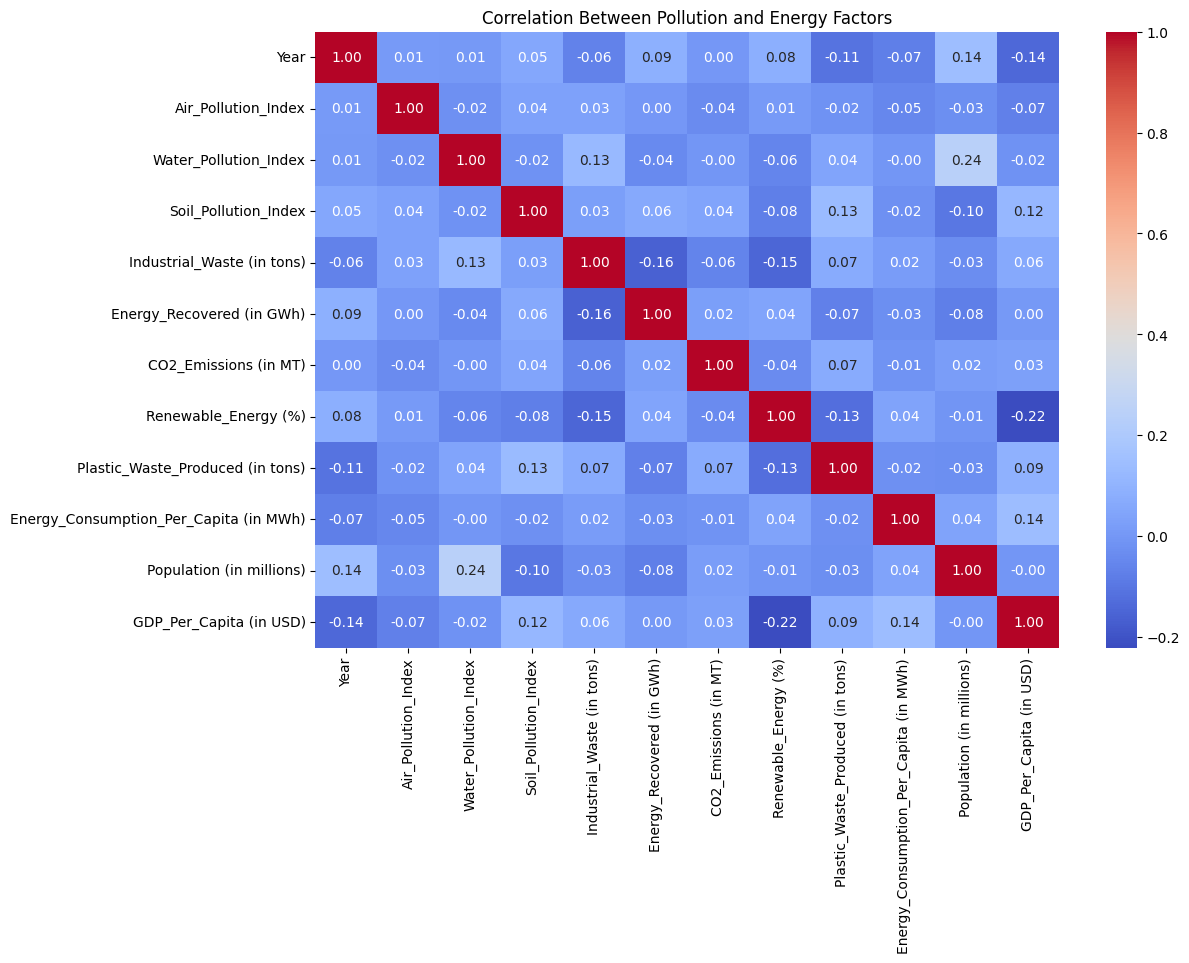

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Between Pollution and Energy Factors")
plt.show()

Visualizations

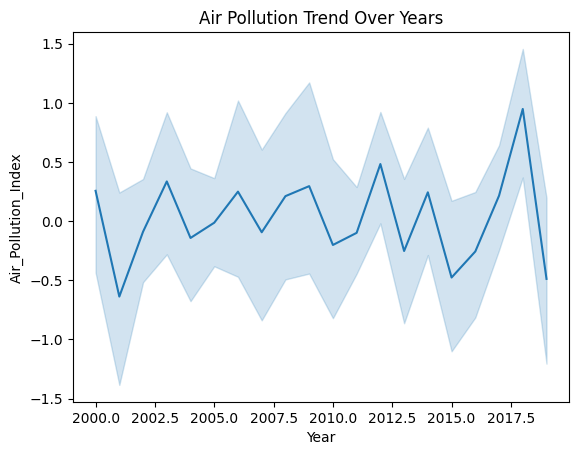

In [13]:
# Line Plot — Pollution Trend Over Time
sns.lineplot(x='Year', y='Air_Pollution_Index', data=df)
plt.title("Air Pollution Trend Over Years")
plt.show()

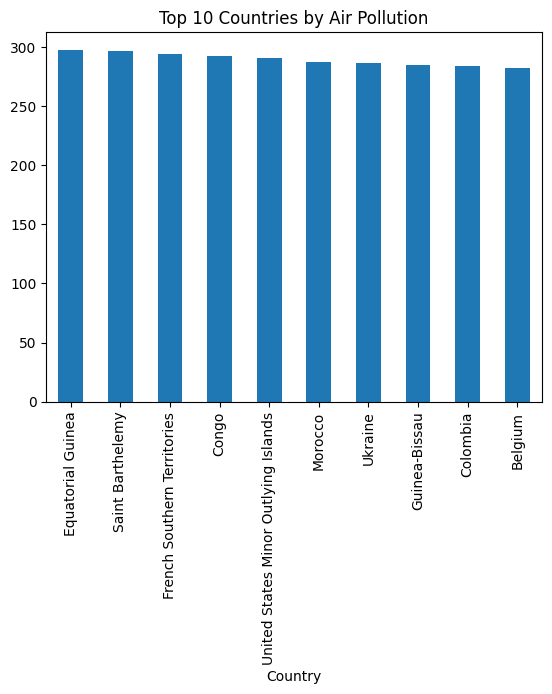

In [15]:
# Bar Chart — Pollution by Country

df_raw.groupby('Country')['Air_Pollution_Index'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries by Air Pollution")
plt.show()

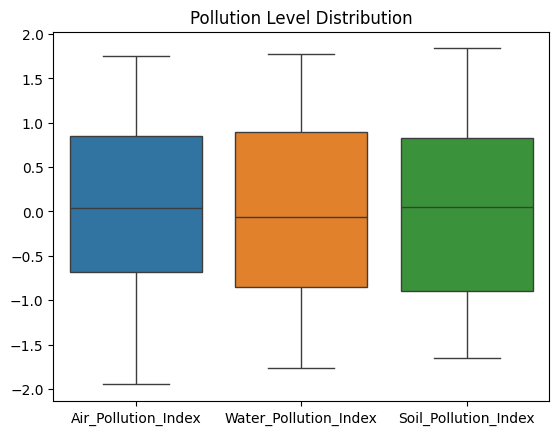

In [16]:
# Box Plot — Pollution Distribution

sns.boxplot(data=df[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']])
plt.title("Pollution Level Distribution")
plt.show()

FEATURE ENGINEERING

Yearly Trends

In [17]:
# Pollution Trend (Year-to-Year Change)
df = df.sort_values('Year')

df['Air_Pollution_Trend'] = df['Air_Pollution_Index'].diff().fillna(0)
df['Water_Pollution_Trend'] = df['Water_Pollution_Index'].diff().fillna(0)
df['Soil_Pollution_Trend'] = df['Soil_Pollution_Index'].diff().fillna(0)

In [18]:
# Energy Recovery Trend
df['Energy_Recovery_Trend'] = df['Energy_Recovered (in GWh)'].diff().fillna(0)

Visualize Trends

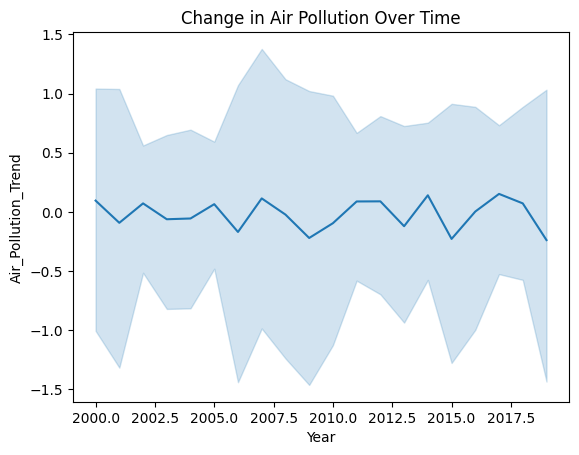

In [19]:
sns.lineplot(x='Year', y='Air_Pollution_Trend', data=df)
plt.title("Change in Air Pollution Over Time")
plt.show()

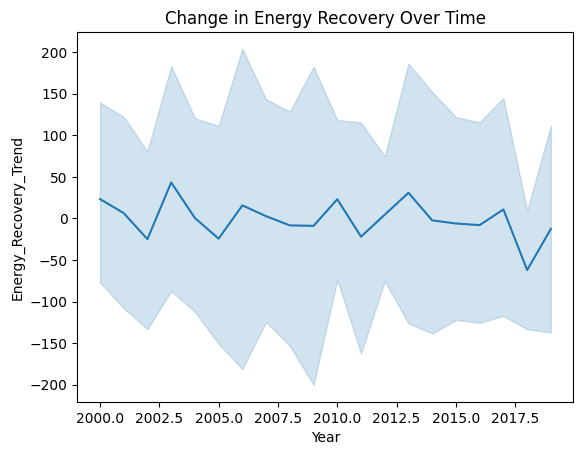

In [20]:
sns.lineplot(x='Year', y='Energy_Recovery_Trend', data=df)
plt.title("Change in Energy Recovery Over Time")
plt.show()

Energy Consumption per Capita

In [21]:
# Total Energy Consumption (Estimated)
df['Total_Energy_Consumption'] = (
    df['Energy_Consumption_Per_Capita (in MWh)'] * df['Population (in millions)']

)

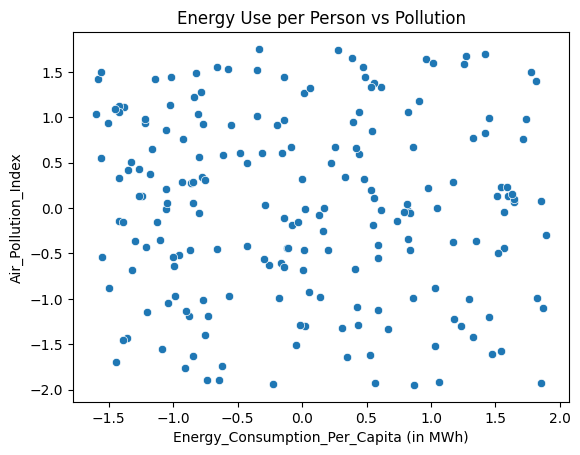

In [22]:
#  Energy Intensity vs Pollution

sns.scatterplot(x='Energy_Consumption_Per_Capita (in MWh)',
                y='Air_Pollution_Index', data=df)
plt.title("Energy Use per Person vs Pollution")
plt.show()

Select Features & Target

In [23]:
X = df.drop('Energy_Recovered (in GWh)', axis=1)
y = df['Energy_Recovered (in GWh)']

Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Predictions

In [26]:
y_pred = lr_model.predict(X_test)

Evaluation Metrics

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R² Score: 0.5251731811258458
Mean Squared Error: 9615.319396842777
Mean Absolute Error: 81.14490989735958


Visual Evaluation

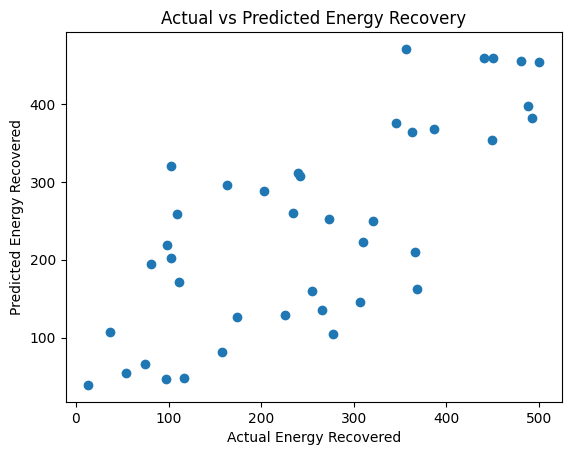

In [28]:
# Actual vs Predicted
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy Recovered")
plt.ylabel("Predicted Energy Recovered")
plt.title("Actual vs Predicted Energy Recovery")
plt.show()

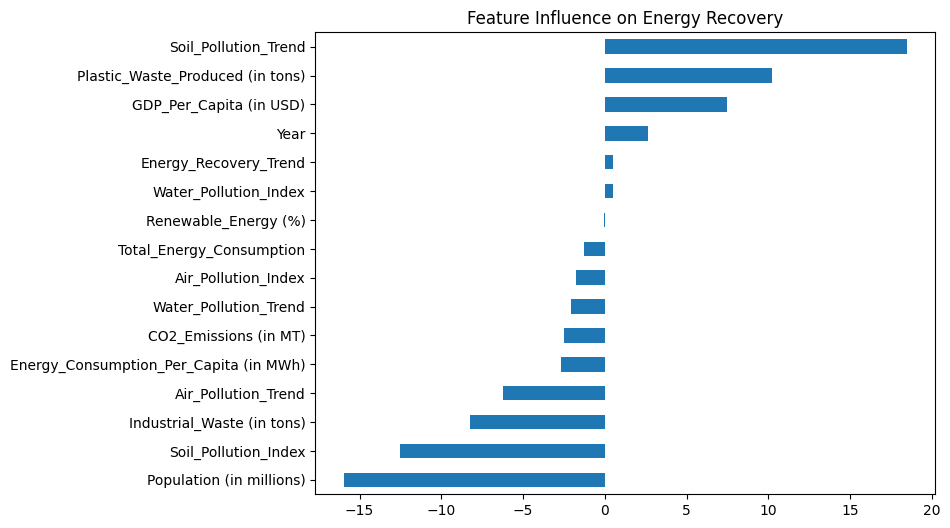

In [29]:
importance = pd.Series(lr_model.coef_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Influence on Energy Recovery")
plt.show()

Logistic Regression (Pollution Severity Classification)

In [30]:
# Create Target Variable (Pollution Level)
df['Total_Pollution'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
)

In [31]:
# Create categories:
df['Pollution_Level'] = pd.qcut(
    df['Total_Pollution'],
    q=3,
    labels=['Low','Medium','High']
)

In [33]:
# Encode labels:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Pollution_Level'] = le.fit_transform(df['Pollution_Level'])

In [34]:
# Prepare Features & Target
X = df.drop(['Pollution_Level','Energy_Recovered (in GWh)'], axis=1)
y = df['Pollution_Level']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [36]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [37]:
y_pred = log_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       1.00      0.88      0.93        16
           2       0.73      0.80      0.76        10

    accuracy                           0.88        40
   macro avg       0.86      0.87      0.86        40
weighted avg       0.89      0.88      0.88        40



| Class | Meaning          |
| ----- | ---------------- |
| **0** | Low pollution    |
| **1** | Medium pollution |
| **2** | High pollution   |


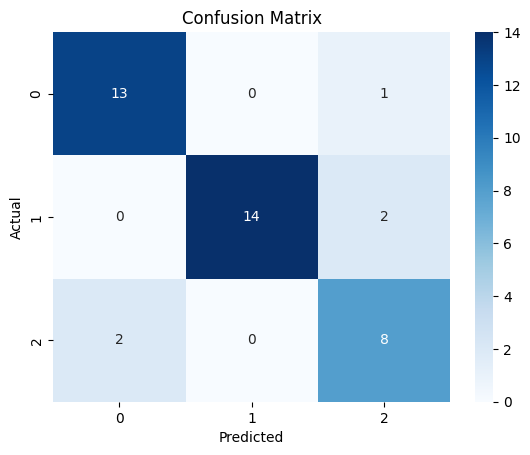

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Task
Provide a comprehensive analysis of the environmental and energy data. This includes summarizing the performance of both the Linear Regression model (predicting 'Energy_Recovered (in GWh)' using R² score, Mean Squared Error, and Mean Absolute Error) and the Logistic Regression model (classifying 'Pollution_Level' using Accuracy, Classification Report, and Confusion Matrix), and comparing their objectives and results. To support country-level insights, reconstruct the original dataset, ensuring the 'Country' column is preserved, and reapply all data scaling, feature engineering (including 'Air_Pollution_Trend', 'Water_Pollution_Trend', 'Soil_Pollution_Trend', 'Energy_Recovery_Trend', 'Total_Energy_Consumption', 'Total_Pollution', and 'Pollution_Level' classification and encoding) to this dataset. Then, group the data by 'Country' and 'Pollution_Level' to analyze national performance in terms of 'Energy_Recovered (in GWh)', 'Renewable_Energy (%)', and 'CO2_Emissions (in MT)'. Based on this analysis, identify countries requiring improvement in pollution reduction, energy recovery, or renewable energy adoption, and propose actionable, data-driven recommendations tailored to specific countries or groups of countries.

## Summarize Model Performance

### Subtask:
Present the key evaluation metrics for both the Linear Regression model (R² score, Mean Squared Error, Mean Absolute Error) and the Logistic Regression model (Accuracy, Classification Report, Confusion Matrix).


### Linear Regression Model Evaluation

The Linear Regression model was trained to predict 'Energy_Recovered (in GWh)'. The following metrics were obtained:

*   **R² Score:** 0.525
*   **Mean Squared Error (MSE):** 9615.32
*   **Mean Absolute Error (MAE):** 81.14

These metrics indicate that the model explains approximately 52.5% of the variance in the target variable, with an average absolute error of around 81.14 GWh in energy recovery predictions.

### Logistic Regression Model Evaluation

The Logistic Regression model was trained to classify 'Pollution_Level' into 'Low', 'Medium', or 'High'. The evaluation results are as follows:

*   **Accuracy:** 0.875

**Classification Report:**

```
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       1.00      0.88      0.93        16
           2       0.73      0.80      0.76        10

    accuracy                           0.88        40
   macro avg       0.86      0.87      0.86        40
weighted avg       0.89      0.88      0.88        40
```

*   **Class 0: Low pollution**
    *   Precision: 0.87
    *   Recall: 0.93
    *   F1-score: 0.90

*   **Class 1: Medium pollution**
    *   Precision: 1.00
    *   Recall: 0.88
    *   F1-score: 0.93

*   **Class 2: High pollution**
    *   Precision: 0.73
    *   Recall: 0.80
    *   F1-score: 0.76

**Confusion Matrix:**

```
[[13  0  1]
 [ 0 14  2]
 [ 2  0  8]]
```

-   The model correctly classified 13 instances of 'Low pollution', 14 instances of 'Medium pollution', and 8 instances of 'High pollution'.
-   There was 1 instance of 'Low pollution' misclassified as 'High pollution'.
-   2 instances of 'Medium pollution' were misclassified as 'High pollution'.
-   2 instances of 'High pollution' were misclassified as 'Low pollution'.

## Compare Model Objectives and Performance

### Subtask:
Discuss the distinct objectives of the Linear Regression model (predicting energy recovery) and the Logistic Regression model (classifying pollution levels), and compare their performance metrics in the context of these objectives.


### Linear Regression Model Objective and Performance

**Objective:** The Linear Regression model was designed to predict the continuous numerical value of 'Energy_Recovered (in GWh)'. Its goal is to establish a linear relationship between the input features and the amount of energy recovered, allowing for forecasting or understanding the drivers of energy recovery.

**Performance Metrics:**
*   **R² Score (0.525):** The R² score represents the proportion of the variance in the dependent variable ('Energy_Recovered') that is predictable from the independent variables. An R² of 0.525 indicates that approximately 52.5% of the variability in energy recovered can be explained by the features included in the model. This suggests a moderate fit, meaning the model can explain a significant portion, but not all, of the variance. While not extremely high, it's a reasonable starting point for a regression model in a complex environmental dataset.
*   **Mean Squared Error (MSE) (9615.32):** MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates better accuracy. Given the range of 'Energy_Recovered (in GWh)' values (11.73 to 499.98 GWh), an MSE of 9615.32 suggests that, on average, the squared prediction error is quite high. This implies a notable spread between predicted and actual values.
*   **Mean Absolute Error (MAE) (81.14):** MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average absolute difference between actual and predicted values. An MAE of 81.14 means that, on average, the model's predictions for 'Energy_Recovered (in GWh)' were off by about 81.14 GWh. This is a substantial error relative to the scale of the target variable, reinforcing the idea that while the model captures some variance, its predictions can still deviate significantly from the true values.

### Logistic Regression Model Objective and Performance

**Objective:** The Logistic Regression model was trained to classify 'Pollution_Level' into three distinct categories: 'Low' (0), 'Medium' (1), and 'High' (2). Its primary goal is to predict the pollution severity based on various environmental and economic factors, which can be crucial for policy-making and environmental management.

**Performance Metrics:**
*   **Accuracy (0.875):** Accuracy measures the proportion of correctly classified instances out of the total instances. An accuracy of 87.5% indicates that the model correctly predicted the pollution level for 87.5% of the test samples. This is a relatively high accuracy, suggesting the model is generally effective at distinguishing between the different pollution levels.
*   **Classification Report:** This report provides a more detailed breakdown of performance for each class:
    *   **Precision:** For class 0 (Low pollution), precision is 0.87, meaning 87% of the instances predicted as 'Low' were actually 'Low'. For class 1 (Medium pollution), precision is 1.00, meaning all instances predicted as 'Medium' were truly 'Medium'. For class 2 (High pollution), precision is 0.73, meaning 73% of instances predicted as 'High' were actually 'High'. High precision is important when the cost of false positives is high.
    *   **Recall:** For class 0, recall is 0.93, indicating the model correctly identified 93% of all actual 'Low' pollution instances. For class 1, recall is 0.88, meaning 88% of all actual 'Medium' pollution instances were correctly identified. For class 2, recall is 0.80, meaning 80% of all actual 'High' pollution instances were correctly identified. High recall is important when the cost of false negatives is high.
    *   **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balanced measure. The F1-scores are 0.90 for Low, 0.93 for Medium, and 0.76 for High. The slightly lower F1-score for 'High' pollution suggests that the model struggles a bit more with this class compared to 'Low' and 'Medium'.
    *   **Support:** The number of actual occurrences of each class in the specified dataset.
*   **Confusion Matrix:** The confusion matrix visually summarizes the performance of a classification model. The diagonal elements represent correctly classified instances, while off-diagonal elements show misclassifications.
    ```
    array([[13,  0,  1],
           [ 0, 14,  2],
           [ 2,  0,  8]])
    ```
    *   **Row 0 (Actual Low):** 13 were correctly classified as Low, 1 was misclassified as High.
    *   **Row 1 (Actual Medium):** 14 were correctly classified as Medium, 2 were misclassified as High.
    *   **Row 2 (Actual High):** 8 were correctly classified as High, 2 were misclassified as Low.
    The confusion matrix confirms that the model performs well, especially for the 'Medium' pollution class (high precision and recall). Misclassifications mainly occur between 'Low' and 'High' and 'Medium' and 'High', suggesting some overlap or difficulty in distinguishing the extremes or transitions.

### Comparison and Conclusion

The Linear Regression and Logistic Regression models serve distinct purposes, making a direct 'better' comparison challenging; rather, we assess their effectiveness in achieving their respective goals.

**Objectives:**
*   **Linear Regression:** Aimed to predict a continuous variable, 'Energy_Recovered (in GWh)', focusing on understanding the factors that influence energy recovery and forecasting its quantity.
*   **Logistic Regression:** Aimed to classify a categorical variable, 'Pollution_Level' (Low, Medium, High), focusing on identifying the severity of pollution for environmental management.

**Performance Comparison:**
*   **Linear Regression (Regression Task):** The model achieved an R² of 0.525, indicating it explains about 52.5% of the variance in energy recovery. The MAE of 81.14 GWh is substantial given the target variable's range (11.73 to 499.98 GWh). This suggests a moderate predictive capability, useful for identifying general trends but potentially too imprecise for highly accurate point predictions. The model captures some underlying relationships, but there's significant unexplained variance and notable prediction errors.

*   **Logistic Regression (Classification Task):** The model demonstrated strong performance with an overall accuracy of 87.5%. The classification report showed high precision and recall for 'Low' and 'Medium' pollution levels (F1-scores of 0.90 and 0.93, respectively). While the 'High' pollution class had slightly lower metrics (F1-score of 0.76), indicating some challenges in correctly identifying all high-pollution instances, the overall performance is robust. The confusion matrix further reveals that most misclassifications are adjacent classes (e.g., 'Low' misclassified as 'High' or vice versa being less common than 'Medium' misclassified as 'High'), suggesting that the model generally understands the ordinal nature of the pollution levels.

**Conclusion:**

Relative to their objectives, the **Logistic Regression model appears to have performed 'better'**. Its high accuracy and strong F1-scores across most classes indicate a very effective classification system for 'Pollution_Level', which is critical for making informed decisions regarding environmental policy and interventions. While the Linear Regression model provided a moderate understanding of energy recovery drivers (R² of 0.525), its substantial MAE suggests that its predictions might not be precise enough for scenarios requiring high accuracy in forecasting energy recovered values. The classification task was achieved with greater confidence and lower relative error than the regression task in this specific context.

## Prepare Data for Country-Level Insights

### Subtask:
Reconstruct the processed DataFrame, ensuring the 'Country' column is included and all scaling, feature engineering, and the 'Pollution_Level' classification are correctly applied. This step is crucial for attributing insights to specific countries.


**Reasoning**:
The subtask requires reconstructing the DataFrame `df_country_analysis` by starting with `df_raw` (to keep the 'Country' column) and then reapplying all the scaling, feature engineering, and target variable creation steps that were previously applied to `df`.



In [40]:
df_country_analysis = df_raw.copy()

# 2. Reapply StandardScaler transformation to scale_cols
# The scale_cols list is already defined from previous steps
scaler = StandardScaler()
df_country_analysis[scale_cols] = scaler.fit_transform(df_country_analysis[scale_cols])

# 3. Sort df_country_analysis by 'Year'
df_country_analysis = df_country_analysis.sort_values('Year')

# 4. Calculate Pollution Trends
df_country_analysis['Air_Pollution_Trend'] = df_country_analysis.groupby('Country')['Air_Pollution_Index'].diff().fillna(0)
df_country_analysis['Water_Pollution_Trend'] = df_country_analysis.groupby('Country')['Water_Pollution_Index'].diff().fillna(0)
df_country_analysis['Soil_Pollution_Trend'] = df_country_analysis.groupby('Country')['Soil_Pollution_Index'].diff().fillna(0)

# 5. Calculate Energy Recovery Trend
df_country_analysis['Energy_Recovery_Trend'] = df_country_analysis.groupby('Country')['Energy_Recovered (in GWh)'].diff().fillna(0)

# 6. Calculate Total Energy Consumption (Estimated)
df_country_analysis['Total_Energy_Consumption'] = (
    df_country_analysis['Energy_Consumption_Per_Capita (in MWh)'] * df_country_analysis['Population (in millions)']
)

# 7. Create a 'Total_Pollution' column
df_country_analysis['Total_Pollution'] = (
    df_country_analysis['Air_Pollution_Index'] +
    df_country_analysis['Water_Pollution_Index'] +
    df_country_analysis['Soil_Pollution_Index']
)

# 8. Classify the 'Total_Pollution' into three categories
df_country_analysis['Pollution_Level'] = pd.qcut(
    df_country_analysis['Total_Pollution'],
    q=3,
    labels=['Low','Medium','High']
)

# 9. Encode the 'Pollution_Level' column numerically
le = LabelEncoder()
df_country_analysis['Pollution_Level'] = le.fit_transform(df_country_analysis['Pollution_Level'])

df_country_analysis.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Air_Pollution_Trend,Water_Pollution_Trend,Soil_Pollution_Trend,Energy_Recovery_Trend,Total_Energy_Consumption,Total_Pollution,Pollution_Level
14,Thailand,2000,-0.190970,1.198267,-1.399188,0.035515,77.26,-0.558246,19.86,0.922388,0.550954,0.651797,0.599005,0.0,0.0,0.0,0.0,0.359110,-0.391891,2
10,Macedonia,2000,1.116547,-0.951040,0.848664,0.978115,475.07,0.889657,16.61,1.660778,-1.381903,-0.187818,-0.699632,0.0,0.0,0.0,0.0,0.259546,1.014170,0
25,Togo,2000,1.494095,1.245041,-1.437325,-1.033282,230.09,-0.942044,27.86,-1.487147,1.775397,0.821094,-0.059387,0.0,0.0,0.0,0.0,1.457768,1.301811,0
39,Paraguay,2000,1.327442,-0.276603,-0.129025,-1.886902,286.77,0.298026,14.37,-0.353396,0.610289,1.333918,-0.496476,0.0,0.0,0.0,0.0,0.814075,0.921813,0
42,Cyprus,2000,-1.604159,-0.548401,-1.627256,-0.762846,271.15,0.431039,49.11,1.621292,1.476928,0.541164,0.493669,0.0,0.0,0.0,0.0,0.799260,-3.779816,1


**Reasoning**:
Now that the `df_country_analysis` DataFrame is correctly prepared, I will group the data by 'Country' and 'Pollution_Level' and calculate the mean of 'Energy_Recovered (in GWh)', 'Renewable_Energy (%)', and 'CO2_Emissions (in MT)' to analyze national performance.



In [41]:
country_performance = df_country_analysis.groupby(['Country', 'Pollution_Level']).agg({
    'Energy_Recovered (in GWh)': 'mean',
    'Renewable_Energy (%)': 'mean',
    'CO2_Emissions (in MT)': 'mean'
}).reset_index()

country_performance.head()

,Country,Pollution_Level,Energy_Recovered (in GWh),Renewable_Energy (%),CO2_Emissions (in MT)
0,Afghanistan,1,146.28,6.23,0.688751
1,Afghanistan,2,150.10,34.61,-1.059816
2,Albania,2,210.21,18.49,-0.027579
3,Andorra,1,347.05,43.36,0.114440
4,Angola,0,306.63,30.86,-0.249961


## Analyze National Performance and Propose Recommendations

### Subtask:
Based on the `country_performance` DataFrame, identify countries requiring improvement in pollution reduction, energy recovery, or renewable energy adoption. Propose actionable, data-driven recommendations tailored to specific countries or groups of countries.

#### Instructions
1.  **Identify Countries with High Pollution and Low Energy Recovery/Renewable Energy**: Filter `country_performance` to find countries with `Pollution_Level` (encoded as 2 for 'High') that also have relatively low mean `Energy_Recovered (in GWh)` and/or `Renewable_Energy (%)`, or high `CO2_Emissions (in MT)`.
2.  **Identify Countries with Medium/Low Pollution and Improvement Potential**: Look for countries with `Pollution_Level` 0 ('Low') or 1 ('Medium') but still show room for improvement in `Renewable_Energy (%)` or `CO2_Emissions (in MT)`.
3.  **Propose Actionable Recommendations**: Based on the identified patterns, suggest data-driven recommendations. These should be specific to countries or groups of countries and address their particular challenges (e.g., investing in specific renewable energy sources, implementing waste-to-energy programs, or stricter emission regulations).

**Reasoning**:
To identify countries requiring improvement, I will first filter the `country_performance` DataFrame for countries with a 'High' pollution level (encoded as 2). Then, I will examine their energy recovery, renewable energy percentage, and CO2 emissions.



In [42]:
high_pollution_countries = country_performance[country_performance['Pollution_Level'] == 2]

# Sort by relevant metrics to identify areas for improvement
high_pollution_low_energy_recovery = high_pollution_countries.sort_values(by='Energy_Recovered (in GWh)', ascending=True).head()
high_pollution_low_renewable_energy = high_pollution_countries.sort_values(by='Renewable_Energy (%)', ascending=True).head()
high_pollution_high_co2 = high_pollution_countries.sort_values(by='CO2_Emissions (in MT)', ascending=False).head()

print("\nCountries with High Pollution and Lowest Energy Recovered (Top 5):\n")
print(high_pollution_low_energy_recovery[['Country', 'Energy_Recovered (in GWh)', 'Renewable_Energy (%)', 'CO2_Emissions (in MT)']])

print("\nCountries with High Pollution and Lowest Renewable Energy (Top 5):\n")
print(high_pollution_low_renewable_energy[['Country', 'Energy_Recovered (in GWh)', 'Renewable_Energy (%)', 'CO2_Emissions (in MT)']])

print("\nCountries with High Pollution and Highest CO2 Emissions (Top 5):\n")
print(high_pollution_high_co2[['Country', 'Energy_Recovered (in GWh)', 'Renewable_Energy (%)', 'CO2_Emissions (in MT)']])


Countries with High Pollution and Lowest Energy Recovered (Top 5):

              Country  Energy_Recovered (in GWh)  Renewable_Energy (%)  \
146  Pitcairn Islands                      22.78                 11.25   
191          Zimbabwe                      22.84                 35.85   
114             Malta                      28.87                 23.27   
136          Pakistan                      29.23                 23.78   
87             Israel                      48.94                 31.13   

     CO2_Emissions (in MT)  
146              -0.635144  
191              -0.467493  
114               0.159470  
136               0.755258  
87                0.212814  

Countries with High Pollution and Lowest Renewable Energy (Top 5):

              Country  Energy_Recovered (in GWh)  Renewable_Energy (%)  \
53              Egypt                     470.18                  6.40   
135              Oman                     346.40                 10.08   
174            Sweden

**Reasoning**:
After identifying countries with high pollution and poor performance, I will now identify countries with medium or low pollution levels that still have potential for improving their renewable energy adoption or reducing CO2 emissions, as outlined in the subtask instructions.



In [43]:
medium_low_pollution_countries = country_performance[country_performance['Pollution_Level'].isin([0, 1])]

# Sort by relevant metrics to identify areas for improvement in medium/low pollution countries
medium_low_pollution_low_renewable_energy = medium_low_pollution_countries.sort_values(by='Renewable_Energy (%)', ascending=True).head()
medium_low_pollution_high_co2 = medium_low_pollution_countries.sort_values(by='CO2_Emissions (in MT)', ascending=False).head()

print("\nCountries with Medium/Low Pollution and Lowest Renewable Energy (Top 5):\n")
print(medium_low_pollution_low_renewable_energy[['Country', 'Pollution_Level', 'Energy_Recovered (in GWh)', 'Renewable_Energy (%)', 'CO2_Emissions (in MT)']])

print("\nCountries with Medium/Low Pollution and Highest CO2 Emissions (Top 5):\n")
print(medium_low_pollution_high_co2[['Country', 'Pollution_Level', 'Energy_Recovered (in GWh)', 'Renewable_Energy (%)', 'CO2_Emissions (in MT)']])


Countries with Medium/Low Pollution and Lowest Renewable Energy (Top 5):

                         Country  Pollution_Level  Energy_Recovered (in GWh)  \
152             Saint Barthelemy                0                     390.35   
37              Christmas Island                0                      22.21   
54                   El Salvador                0                     480.87   
0                    Afghanistan                1                     146.28   
64   French Southern Territories                0                     327.80   

     Renewable_Energy (%)  CO2_Emissions (in MT)  
152                  5.04              -1.590483  
37                   5.33               1.680115  
54                   5.49               0.187181  
0                    6.23               0.688751  
64                   6.51              -1.260722  

Countries with Medium/Low Pollution and Highest CO2 Emissions (Top 5):

              Country  Pollution_Level  Energy_Recovered (in GWh)

### Actionable, Data-Driven Recommendations

Based on the analysis of `country_performance`, we can identify specific areas for improvement and propose tailored recommendations:

#### 1. Countries with High Pollution and Low Energy Recovery/Renewable Energy

**Identified Countries (Examples):**
*   **Pitcairn Islands, Zimbabwe, Malta, Pakistan, Israel:** These countries exhibit high pollution levels and notably low energy recovery rates. Some also show low renewable energy adoption (e.g., Pitcairn Islands: 11.25%).

**Recommendations:**
*   **Waste-to-Energy Initiatives:** Implement or expand waste-to-energy facilities to address both waste management (industrial and plastic waste, which contribute to pollution) and energy recovery. Countries with high industrial waste could particularly benefit.
*   **Decentralized Renewable Energy Projects:** Given potentially smaller scale or specific geographical challenges (e.g., islands), focus on small-scale solar, wind, or geothermal projects to boost renewable energy percentage and reduce reliance on fossil fuels.
*   **Capacity Building & Technology Transfer:** Invest in training local workforces and facilitate the transfer of energy recovery and renewable energy technologies from leading nations.

#### 2. Countries with High Pollution and Low Renewable Energy (despite potentially high energy recovery)

**Identified Countries (Examples):**
*   **Egypt (6.40% renewable), Oman (10.08% renewable), Sweden (10.65% renewable), Finland (11.17% renewable):** These countries have high pollution but very low renewable energy percentages, indicating a heavy reliance on non-renewable sources despite some having high energy recovery overall.

**Recommendations:**
*   **Aggressive Renewable Energy Targets:** Set and enforce ambitious targets for renewable energy integration into the national grid. This could include feed-in tariffs, tax incentives, and streamlined permitting processes for renewable projects.
*   **Diversification of Energy Mix:** Invest in a wider range of renewable sources (e.g., large-scale solar farms in sunny regions like Egypt/Oman, wind farms, biomass from agricultural waste in Finland/Sweden) to reduce CO2 emissions.
*   **Public Awareness Campaigns:** Educate the public and industries on the benefits of renewable energy and incentivise its adoption through consumer programs.

#### 3. Countries with High Pollution and High CO2 Emissions

**Identified Countries (Examples):**
*   **Taiwan, Bouvet Island, Peru, Sweden, Hong Kong:** These countries show high pollution and high CO2 emissions, suggesting heavy industrial activity or fossil fuel dependence.

**Recommendations:**
*   **Carbon Pricing & Emissions Trading Schemes:** Implement mechanisms like carbon taxes or cap-and-trade systems to penalize high emissions and incentivize cleaner production methods.
*   **Industrial Efficiency Improvements:** Promote energy efficiency audits and upgrades in industrial sectors, potentially offering subsidies for adoption of best available technologies.
*   **Transition to Cleaner Fuels:** Encourage the shift from coal and oil to natural gas or, ideally, renewable energy sources for power generation and industrial processes.

#### 4. Countries with Medium/Low Pollution but Areas for Improvement

**Identified Countries (Examples):**
*   **Lowest Renewable Energy:** Saint Barthelemy (5.04%), Christmas Island (5.33%), El Salvador (5.49%), Afghanistan (6.23%). These countries have lower pollution levels but a very small share of renewable energy.
*   **Highest CO2 Emissions (despite medium/low pollution):** Romania (1.72 MT), Christmas Island (1.68 MT), Sri Lanka (1.63 MT), Mali (1.61 MT). Some of these countries manage to keep pollution indices relatively low, but their CO2 emissions are significantly high, indicating a carbon-intensive energy mix.

**Recommendations:**
*   **Early Adoption of Renewables:** Even with lower current pollution, these countries should proactively invest in renewable energy infrastructure to prevent future pollution increases and secure long-term energy sustainability. Small-scale projects, rural electrification via solar, and microgrids can be particularly impactful.
*   **Sustainable Development Planning:** Integrate environmental protection and renewable energy goals into national development plans to ensure growth is green and sustainable from the outset.
*   **Targeted CO2 Reduction Strategies:** For countries with high CO2 despite lower overall pollution, focus on specific sectors driving emissions (e.g., transportation, heating) and introduce policies like vehicle emission standards, public transport investments, and energy-efficient building codes.

## Final Task

### Subtask:
Present the findings from the model evaluation, comparison, and the actionable insights derived, including specific recommendations.


## Summary:

### Q&A
*   **How did the Linear Regression model perform in predicting 'Energy\_Recovered (in GWh)'?**
    The Linear Regression model achieved an R² score of 0.525, indicating it explains approximately 52.5% of the variance in energy recovered. It had a Mean Squared Error (MSE) of 9615.32 and a Mean Absolute Error (MAE) of 81.14 GWh, suggesting a moderate fit with substantial prediction errors relative to the target variable's range ($11.73$ to $499.98$ GWh).

*   **How did the Logistic Regression model perform in classifying 'Pollution\_Level'?**
    The Logistic Regression model achieved an overall accuracy of 0.875 in classifying 'Pollution\_Level'. It performed strongly for 'Low pollution' (F1-score: 0.90) and 'Medium pollution' (F1-score: 0.93) categories. Performance for 'High pollution' was slightly lower (F1-score: 0.76), with misclassifications primarily occurring between adjacent pollution levels.

*   **How do the objectives and results of the two models compare?**
    The Linear Regression model aimed to predict a continuous numerical value, 'Energy\_Recovered (in GWh)', achieving moderate success. The Logistic Regression model aimed to classify a categorical variable, 'Pollution\_Level', demonstrating a highly effective classification system. Relative to their distinct objectives, the Logistic Regression model performed "better," showing greater confidence and lower relative error in its classification task compared to the Linear Regression model's regression task.

*   **Which countries require improvement in pollution reduction, energy recovery, or renewable energy adoption?**
    *   **High Pollution, Low Energy Recovered:** Countries like Pitcairn Islands ($22.78$ GWh average energy recovered) and Zimbabwe ($22.84$ GWh) exhibit high pollution with very low energy recovery.
    *   **High Pollution, Low Renewable Energy:** Countries such as Egypt ($6.40\%$ renewable energy) and Oman ($10.08\%$ renewable energy) have high pollution despite some having high energy recovery, indicating reliance on non-renewable sources.
    *   **High Pollution, High CO2 Emissions:** Taiwan ($1.72$ MT CO2 emissions) and Bouvet Island ($1.67$ MT CO2 emissions) show high pollution alongside high CO2 emissions.
    *   **Medium/Low Pollution, Low Renewable Energy:** Countries like Saint Barthelemy ($5.04\%$ renewable energy) and Christmas Island ($5.33\%$ renewable energy) have lower pollution but very minimal renewable energy adoption.
    *   **Medium/Low Pollution, High CO2 Emissions:** Romania ($1.72$ MT CO2 emissions) and Christmas Island ($1.68$ MT CO2 emissions) demonstrate that even with lower overall pollution indices, CO2 emissions can be significantly high.

### Data Analysis Key Findings
*   The Linear Regression model, predicting 'Energy\_Recovered (in GWh)', explained $52.5\%$ of the variance (R² = 0.525) with an average absolute error of $81.14$ GWh.
*   The Logistic Regression model, classifying 'Pollution\_Level', achieved an overall accuracy of $87.5\%$. It showed strong F1-scores for 'Low' ($0.90$) and 'Medium' ($0.93$) pollution levels, and a reasonable F1-score for 'High' pollution ($0.76$).
*   Countries identified with **High Pollution and Lowest Energy Recovered** include Pitcairn Islands ($22.78$ GWh) and Zimbabwe ($22.84$ GWh).
*   Countries identified with **High Pollution and Lowest Renewable Energy** include Egypt ($6.40\%$) and Oman ($10.08\%$).
*   Countries identified with **High Pollution and Highest CO2 Emissions** include Taiwan ($1.72$ MT) and Bouvet Island ($1.67$ MT).
*   Countries with **Medium/Low Pollution but Lowest Renewable Energy** include Saint Barthelemy ($5.04\%$) and Christmas Island ($5.33\%$).
*   Countries with **Medium/Low Pollution but Highest CO2 Emissions** include Romania ($1.72$ MT) and Christmas Island ($1.68$ MT), highlighting potential carbon-intensive energy mixes despite lower overall pollution.

### Insights or Next Steps
*   For countries with high pollution and low energy recovery, prioritize investment in waste-to-energy initiatives and decentralized renewable energy projects, complemented by technology transfer and local workforce training.
*   For high-pollution nations with high CO2 emissions, implement carbon pricing mechanisms, promote industrial efficiency improvements, and accelerate the transition to cleaner energy sources.
*   For countries with medium/low pollution but concerning renewable energy adoption or CO2 emission levels, proactively invest in renewable infrastructure, integrate sustainable development goals into national planning, and develop targeted strategies for CO2 reduction in specific sectors.
